In [1]:
import sys
import cv2
import os
sys.path.append('/usr/local/python')
from openpose import pyopenpose as op
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [124]:
# Starting openpose
params = dict()
params["model_folder"] = "/home/david/Documents/openpose/models"
params["model_pose"] = "BODY_25"
params["render_threshold"] = 0.001

opWrapper = op.WrapperPython()
opWrapper.configure(params)
opWrapper.start()

In [120]:
mapping = op.getPoseBodyPartMapping(op.PoseModel.BODY_25)

In [121]:
mapping

{0: 'Nose',
 1: 'Neck',
 2: 'RShoulder',
 3: 'RElbow',
 4: 'RWrist',
 5: 'LShoulder',
 6: 'LElbow',
 7: 'LWrist',
 8: 'MidHip',
 9: 'RHip',
 10: 'RKnee',
 11: 'RAnkle',
 12: 'LHip',
 13: 'LKnee',
 14: 'LAnkle',
 15: 'REye',
 16: 'LEye',
 17: 'REar',
 18: 'LEar',
 19: 'LBigToe',
 20: 'LSmallToe',
 21: 'LHeel',
 22: 'RBigToe',
 23: 'RSmallToe',
 24: 'RHeel',
 25: 'Background'}

In [105]:
mapping_reverse = dict((v,k) for k,v in mapping.items())

In [106]:
keys = ['Nose', 'RShoulder', 'RElbow', 'RWrist', 'LShoulder', 'LElbow', 'LWrist', 'RHip', 'RKnee', 'RAnkle',
       'LHip', 'LKnee', 'LAnkle', 'REye', 'LEye', 'REar', 'LEar']
keys_idxs = [mapping_reverse.get(key) for key in keys] 

In [107]:
keys_idxs

[0, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]

In [108]:
dict((v,k) for k,v in mapping_reverse.items() if v in keys_idxs)

{0: 'Nose',
 2: 'RShoulder',
 3: 'RElbow',
 4: 'RWrist',
 5: 'LShoulder',
 6: 'LElbow',
 7: 'LWrist',
 9: 'RHip',
 10: 'RKnee',
 11: 'RAnkle',
 12: 'LHip',
 13: 'LKnee',
 14: 'LAnkle',
 15: 'REye',
 16: 'LEye',
 17: 'REar',
 18: 'LEar'}

In [109]:
frame = cv2.imread('federer.png')

In [60]:
cap = cv2.VideoCapture('federer_cut.mp4')
for i in range(202):
    ret, frame = cap.read()
cap.release()

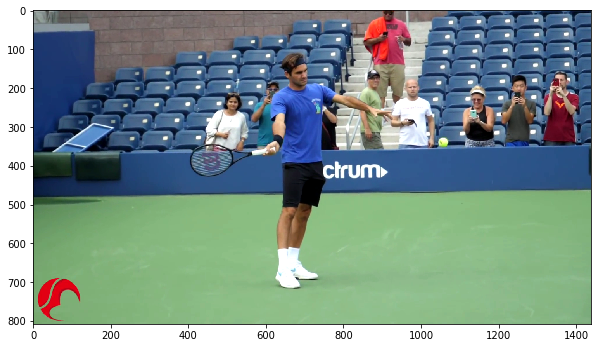

In [110]:
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [125]:
%%time

# Process Image
datum = op.Datum()
datum.cvInputData = frame
opWrapper.emplaceAndPop(op.VectorDatum([datum]))

CPU times: user 1.82 s, sys: 88.8 ms, total: 1.91 s
Wall time: 1.84 s


In [112]:
xs[keys_idxs]

IndexError: index 17 is out of bounds for axis 0 with size 17

In [113]:
biggest = 0
bounding_box = None
for i, keypoints in enumerate(datum.poseKeypoints):
    x, y, height, width = get_bounding_box(keypoints)
    surface = height * width
    if surface > biggest:
        biggest = surface
        idx = i
        bounding_box = np.array([x, y, height, width])

In [79]:
datum.poseKeypoints[idx]

array([[6.9866364e+02, 1.6782764e+02, 9.3694478e-01],
       [6.9198383e+02, 2.1629466e+02, 8.8658333e-01],
       [6.4343744e+02, 2.2076727e+02, 9.0821320e-01],
       [6.4119678e+02, 2.8888965e+02, 9.0415895e-01],
       [6.2599054e+02, 3.3522330e+02, 8.5040438e-01],
       [7.3824524e+02, 2.0311951e+02, 8.6612111e-01],
       [8.1303339e+02, 2.3175896e+02, 8.1753629e-01],
       [8.7694037e+02, 2.5589830e+02, 7.5181973e-01],
       [7.0078021e+02, 3.8364636e+02, 7.0166171e-01],
       [6.7649023e+02, 3.8367773e+02, 7.1740264e-01],
       [6.6113257e+02, 5.1580902e+02, 8.7588459e-01],
       [6.4346490e+02, 6.6992438e+02, 7.8647959e-01],
       [7.2947491e+02, 3.8367883e+02, 7.1929228e-01],
       [6.9862567e+02, 5.1793689e+02, 8.4635025e-01],
       [6.7426678e+02, 6.5449066e+02, 7.6677936e-01],
       [6.8974347e+02, 1.6349055e+02, 9.0318334e-01],
       [7.0301373e+02, 1.5468317e+02, 8.5163110e-01],
       [6.5892773e+02, 1.6566119e+02, 9.6265841e-01],
       [0.0000000e+00, 0.000

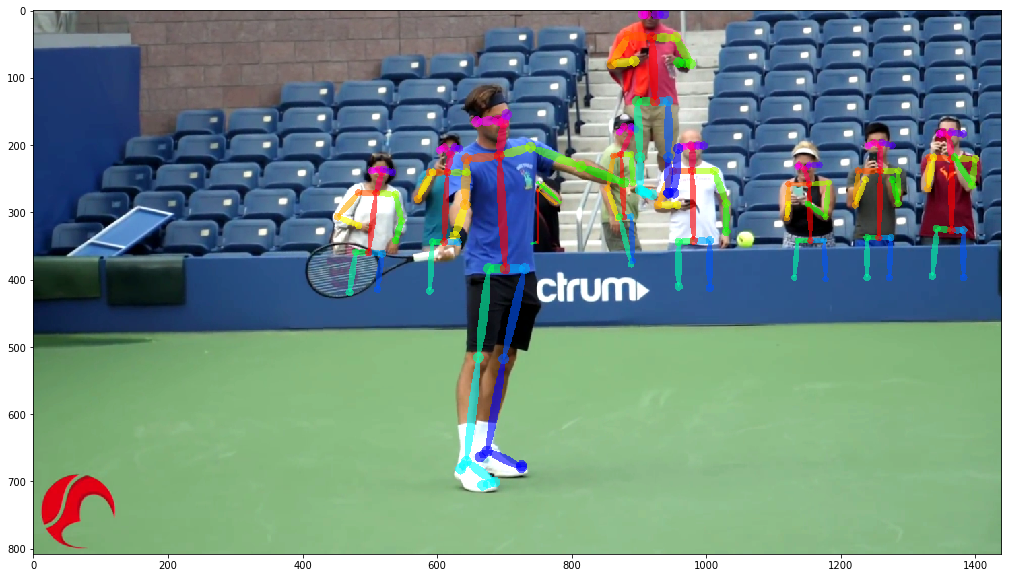

In [126]:
plt.figure(figsize=(20,10))
plt.imshow(cv2.cvtColor(datum.cvOutputData, cv2.COLOR_BGR2RGB))

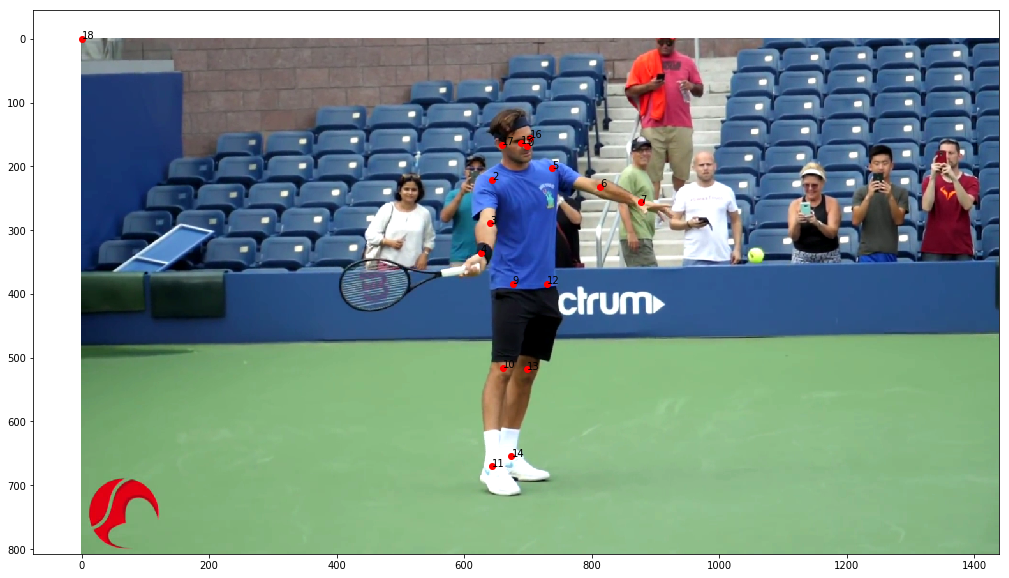

In [114]:
xs = datum.poseKeypoints[idx][:, 0]
ys = datum.poseKeypoints[idx][:, 1]

plt.figure(figsize=(20,10))
plt.imshow(cv2.cvtColor(datum.cvInputData, cv2.COLOR_BGR2RGB))

for i, (x, y) in enumerate(zip(xs, ys)):
    if i not in keys_idxs:
        continue
    plt.scatter(x, y, label=str(i), c='r')
    plt.annotate(str(i), (x, y))


In [68]:
def get_bounding_box(keypoints):
    x = keypoints[:, 0]
    x = x[x != 0]
    y = keypoints[:, 1]
    y = y[y != 0]

    x_max = np.max(x)
    x_min = np.min(x)
    y_max = np.max(y)
    y_min = np.min(y)

    height = y_max - y_min
    width = x_max - x_min
    
    return x_min + width/2,  y_max - height/2, height, width

7 187689.88


In [82]:
x, y, height, width = get_bounding_box(datum.poseKeypoints[6])

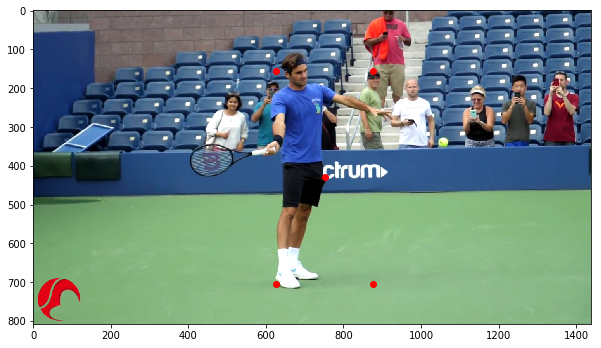

In [83]:
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(datum.cvInputData, cv2.COLOR_BGR2RGB))

plt.scatter(
    [x, x - width/2, x - width/2, x + width/2, x + width/2],
    [y, y + height/2, y - height/2, y + height/2, y - height/2],
    c='r')

In [73]:
detectron_to_openpose = {
    0: 0,
    1: 16,
    2: 15,
    3: 18,
    4: 17,
    5: 5,
    6: 2,
    7: 6,
    8: 3,
    9: 7,
    10: 4,
    11: 12,
    12: 9,
    13: 13,
    14: 10,
    15: 14,
    16: 11
}

In [76]:
keys_for_detectron = [detectron_to_openpose.get(key) for key in np.arange(17)]

In [77]:
xs[keys_for_detectron]

array([1048.297  , 1051.2976 , 1027.7823 ,    0.     ,  995.227  ,
       1001.2098 , 1021.7981 , 1074.8496 , 1145.5349 , 1142.5984 ,
       1148.3564 , 1042.3826 , 1004.19916, 1012.93646,  995.2618 ,
        992.3092 ,  915.8378 ], dtype=float32)

## Openpose to detectron format

In [3]:
detectron_to_openpose = {
    0: 0,
    1: 16,
    2: 15,
    3: 18,
    4: 17,
    5: 5,
    6: 2,
    7: 6,
    8: 3,
    9: 7,
    10: 4,
    11: 12,
    12: 9,
    13: 13,
    14: 10,
    15: 14,
    16: 11
}

keys_for_detectron = [detectron_to_openpose.get(key) for key in np.arange(17)]

In [4]:
def get_bbox_detectron(keypoints):
    x = keypoints[:, 0]
    x = x[x != 0]
    y = keypoints[:, 1]
    y = y[y != 0]
    score = keypoints[:, 2]
    score = np.mean(score[score != 0])
    
    x_max = np.max(x)
    x_min = np.min(x)
    y_max = np.max(y)
    y_min = np.min(y)

    return x_min, y_min, x_max, y_max, score

In [5]:
# Starting openpose
params = dict()
params["model_folder"] = "/home/david/Documents/openpose/models"
params["model_pose"] = "BODY_25"

opWrapper = op.WrapperPython()
opWrapper.configure(params)
opWrapper.start()

In [6]:
frame = cv2.imread('federer.png')

In [7]:
%%time

# Process Image
datum = op.Datum()
datum.cvInputData = frame
opWrapper.emplaceAndPop(op.VectorDatum([datum]))

CPU times: user 3.39 s, sys: 921 ms, total: 4.31 s
Wall time: 6.27 s


In [49]:
boxes = []
segments = []
keypoints = []

In [50]:
# For each frame

kps = datum.poseKeypoints[:, keys_for_detectron, :]
bbox_tensor = np.array([get_bbox_detectron(keypoints) for keypoints in kps])

kps_xy = kps[:, :, :2]
kps_prob = kps[:, :, 2:3]
kps_logit = np.zeros_like(kps_prob)
kps = np.concatenate((kps_xy, kps_logit, kps_prob), axis=2)
kps = kps.transpose(0, 2, 1)


# Mimic Detectron1 format
cls_boxes = [[], bbox_tensor]
cls_keyps = [[], kps]

boxes.append(cls_boxes)
segments.append(None)
keypoints.append(cls_keyps)

In [51]:
# Video resolution
metadata = {
    'w': frame.shape[1],
    'h': frame.shape[0],
}

np.savez_compressed('openpose.npz', boxes=boxes, segments=segments, keypoints=keypoints, metadata=metadata)

## Do on federer video

In [6]:
%%time

boxes = []
segments = []
keypoints = []


cap = cv2.VideoCapture('federer_cut.mp4')
while True:
    ret, frame = cap.read()
    if not ret:
        break
    
    metadata = {
        'w': frame.shape[1],
        'h': frame.shape[0],
    }
    
    # process frame
    datum = op.Datum()
    datum.cvInputData = frame
    opWrapper.emplaceAndPop(op.VectorDatum([datum]))
    
    
    # get keypoints and bounding boxes
    kps = datum.poseKeypoints[:, keys_for_detectron, :]
    bbox_tensor = np.array([get_bbox_detectron(keypoints) for keypoints in kps])

    kps_xy = kps[:, :, :2]
    kps_prob = kps[:, :, 2:3]
    kps_logit = np.zeros_like(kps_prob)
    kps = np.concatenate((kps_xy, kps_logit, kps_prob), axis=2)
    kps = kps.transpose(0, 2, 1)


    # Mimic Detectron1 format
    cls_boxes = [[], bbox_tensor]
    cls_keyps = [[], kps]

    boxes.append(cls_boxes)
    segments.append(None)
    keypoints.append(cls_keyps)

cap.release()

np.savez_compressed('federer_openpose.npz', boxes=boxes, segments=segments, keypoints=keypoints, metadata=metadata)

CPU times: user 18min 26s, sys: 31.3 s, total: 18min 57s
Wall time: 18min 1s


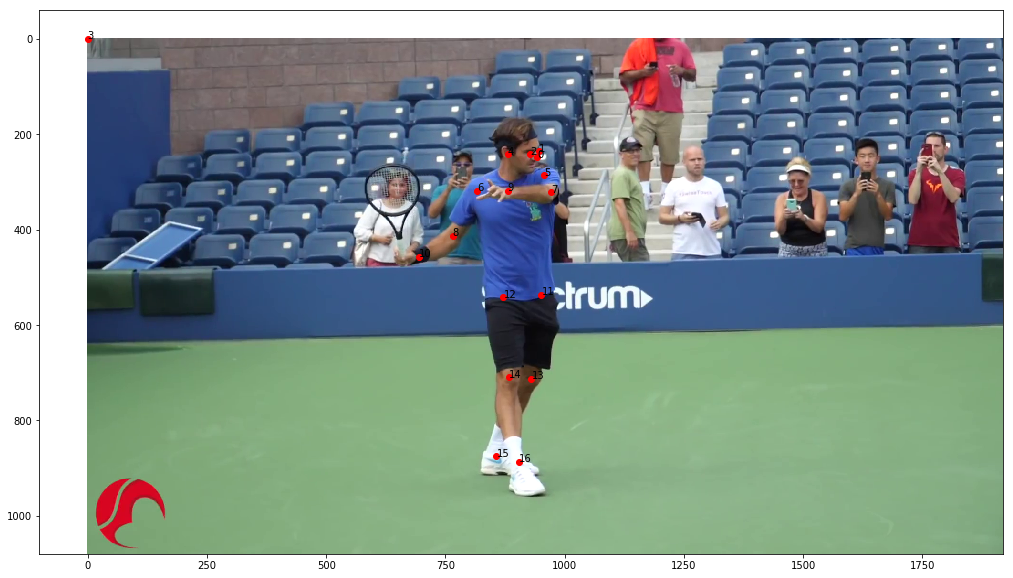

In [101]:
kps = datum.poseKeypoints[:, keys_for_detectron, :]

xs = kps[7][:, 0]
ys = kps[7][:, 1]

plt.figure(figsize=(20,10))
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

for i, (x, y) in enumerate(zip(xs, ys)):
    plt.scatter(x, y, label=str(i), c='r')
    plt.annotate(str(i), (x, y))